# IMPORTING FILES AND FORMATTING

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [51]:
import pandas as pd
import numpy as np # np.arrays are more efficient

df = pd.read_csv('dataset\calls.csv')

df.head(5)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [67]:
# EXCEL THING NEEDS CORRECTION

df['start_time'] = pd.to_datetime(df['call_start_datetime'], format='%m/%d/%Y %H:%M')
df['end_time'] = pd.to_datetime(df['call_end_datetime'], format='%m/%d/%Y %H:%M')
df['assign_time'] = pd.to_datetime(df['agent_assigned_datetime'], format='%m/%d/%Y %H:%M')


df['duration'] = df['end_time'] - df['start_time'] # time when the cusotmer calls till the end of the call
df['waiting'] = df['assign_time'] - df['start_time'] # time to answer
df['after'] = df['end_time'] - df['assign_time'] # handle time 

df['wait_sec'] = df['waiting'].dt.total_seconds() 
df['after_sec'] = df['after'].dt.total_seconds()
df['dura_sec'] = df['duration'].dt.total_seconds()


#relation = df['dura_sec','after_sec']


In [68]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,word_count,start_time,end_time,assign_time,duration,waiting,after,wait_sec,after_sec,dura_sec
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,Agent: Thank you for calling United Airlines c...,408,2024-07-31 23:56:00,2024-08-01 00:34:00,2024-08-01 00:03:00,0 days 00:38:00,0 days 00:07:00,0 days 00:31:00,420.0,1860.0,2280.0
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,"Agent: Thank you for calling United Airlines, ...",485,2024-08-01 00:03:00,2024-08-01 00:18:00,2024-08-01 00:06:00,0 days 00:15:00,0 days 00:03:00,0 days 00:12:00,180.0,720.0,900.0
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,Agent: Thank you for calling United Airlines c...,574,2024-07-31 23:59:00,2024-08-01 00:26:00,2024-08-01 00:07:00,0 days 00:27:00,0 days 00:08:00,0 days 00:19:00,480.0,1140.0,1620.0
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,Agent: Thank you for calling United Airlines c...,592,2024-08-01 00:05:00,2024-08-01 00:17:00,2024-08-01 00:10:00,0 days 00:12:00,0 days 00:05:00,0 days 00:07:00,300.0,420.0,720.0
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,Agent: Thank you for calling United Airlines c...,528,2024-08-01 00:04:00,2024-08-01 00:23:00,2024-08-01 00:14:00,0 days 00:19:00,0 days 00:10:00,0 days 00:09:00,600.0,540.0,1140.0


In [7]:
# Extracting only the time part
df['time_only'] = df['start_time'].dt.time



# FINDING THE RUSH HOUR

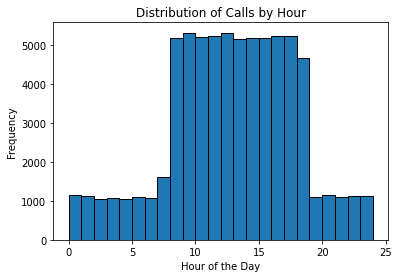

In [80]:
df['hour'] = df['start_time'].dt.hour

# Plot the histogram with 1-hour bins
plt.hist(df['hour'], bins=24, range=(0, 24), edgecolor='black')


plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Calls by Hour')

plt.show()

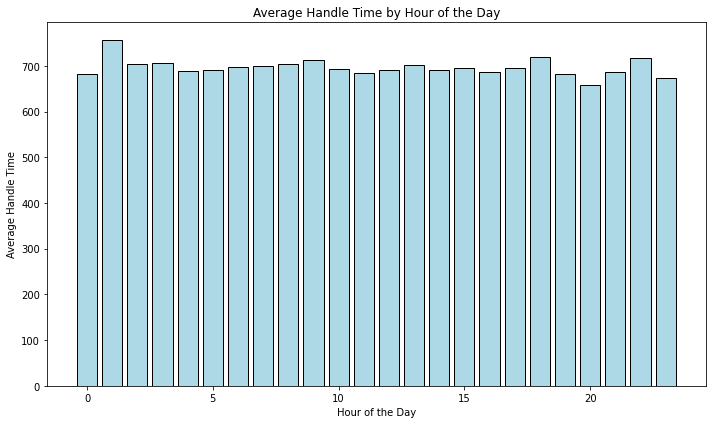

In [12]:
# Group the data by 'hour' and calculate the average 'after_sec'
avg_after_sec_per_hour = df.groupby('hour')['after_sec'].mean().reset_index()

# Plot a bar chart for average 'after_sec' for each hour
plt.figure(figsize=(10, 6))
plt.bar(avg_after_sec_per_hour['hour'], avg_after_sec_per_hour['after_sec'], color='LightBlue', edgecolor='black')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Handle Time')
plt.title('Average Handle Time by Hour of the Day')

# Display the plot
plt.tight_layout()
plt.show()

In [16]:
element2 = df[['call_id','duration','after','dura_sec','after_sec','wait_sec']]

In [14]:
element.head(5)

,call_id,duration,after,dura_sec,after_sec,wait_sec
0,4667960400,0 days 00:38:00,0 days 00:31:00,2280.0,1860.0,420.0
1,1122072124,0 days 00:15:00,0 days 00:12:00,900.0,720.0,180.0
2,6834291559,0 days 00:27:00,0 days 00:19:00,1620.0,1140.0,480.0
3,2266439882,0 days 00:12:00,0 days 00:07:00,720.0,420.0,300.0
4,1211603231,0 days 00:19:00,0 days 00:09:00,1140.0,540.0,600.0


# WAIT TIME VS CALL TIME ( FOR AST AND AHT COMPARISON)

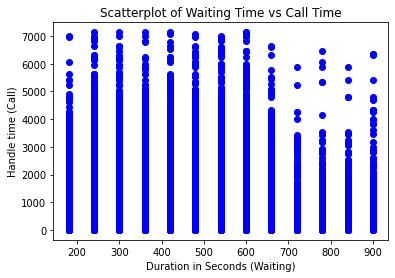

In [17]:
# plotting relation between Waiting_time and Call_time
plt.scatter(element2['wait_sec'], element2['after_sec'], color='blue', marker='o')


plt.xlabel('Duration in Seconds (Waiting)')
plt.ylabel('Handle time (Call)')
plt.title('Scatterplot of Waiting Time vs Call Time')


plt.show()

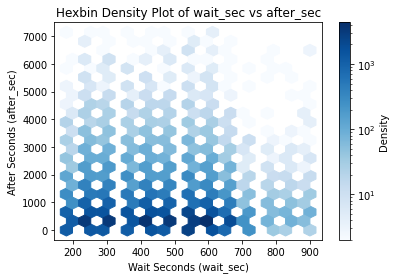

In [18]:
# 
from matplotlib.colors import LogNorm
plt.hexbin(element2['wait_sec'], element2['after_sec'],norm =LogNorm(2), gridsize=20, cmap='Blues')

plt.xlabel('Wait Seconds (wait_sec)')
plt.ylabel('After Seconds (after_sec)')
plt.title('Hexbin Density Plot of wait_sec vs after_sec')

plt.colorbar(label='Density')
plt.show()



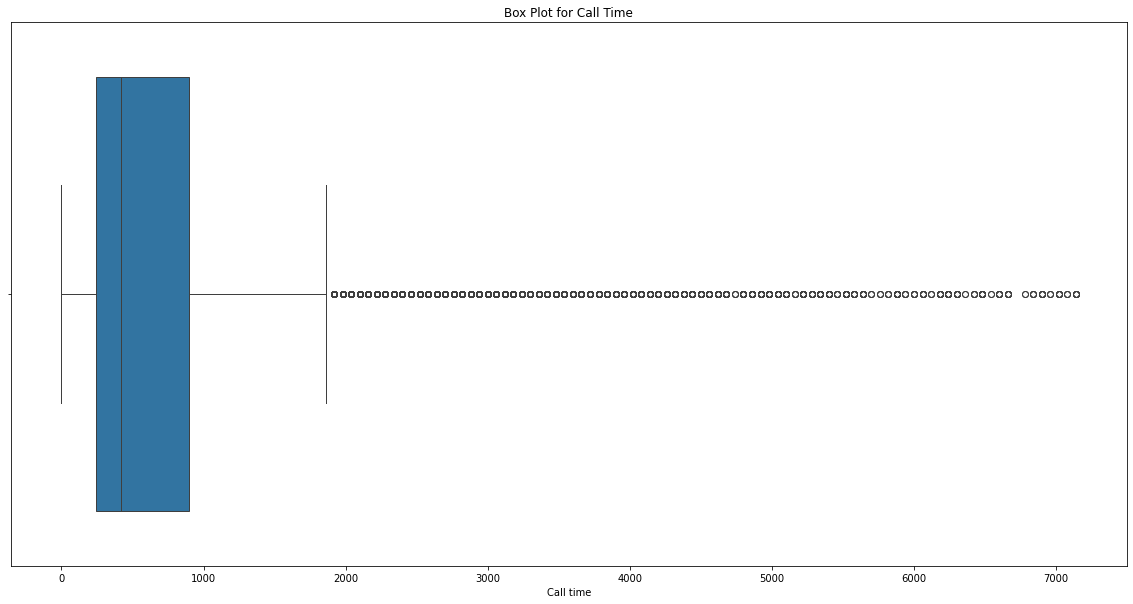

In [25]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=element2, x='after_sec')
plt.xlabel('Call time')
plt.title('Box Plot for Call Time')
plt.show()

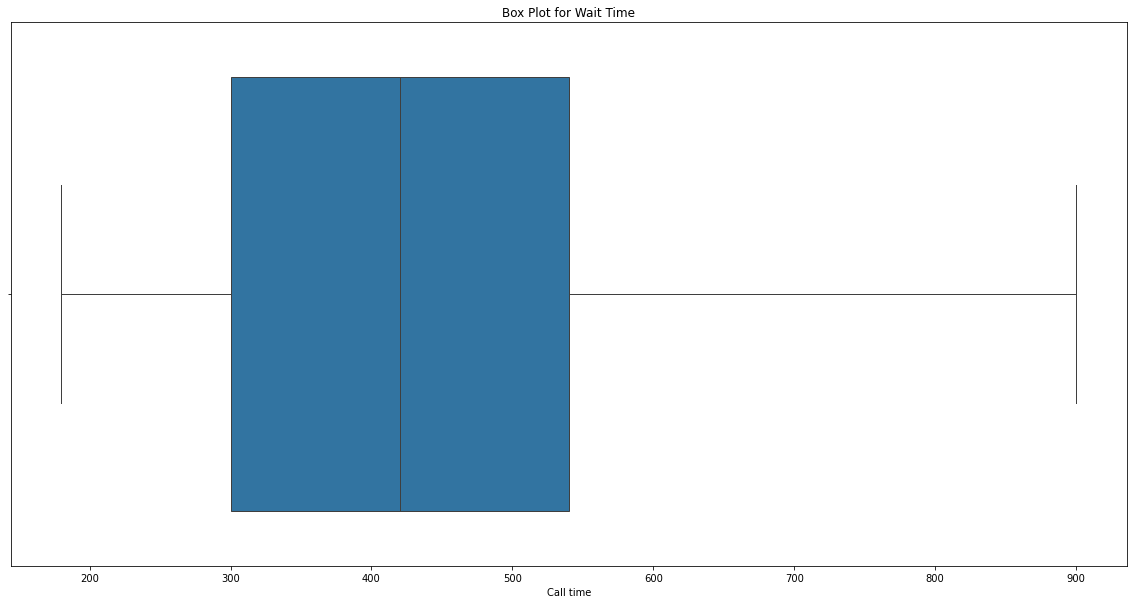

In [39]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=element2, x='wait_sec')
plt.xlabel('Call time')
plt.title('Box Plot for Wait Time')
plt.show()

In [37]:
df[df['after_sec']>2000].shape

(4417, 18)

In [38]:
df.shape

(71810, 18)

In [52]:
outliers = merged_df.loc[merged_df['after_sec'] > 6000, 'call_id']

NameError: name 'merged_df' is not defined

In [275]:
selected_entries = df[df['call_id'].isin(outliers)]

In [276]:
selected_entries.to_csv('saved.csv', index=False)


In [27]:
import pandas as pd


# Cleaning 'call_transcript' column
def filter_transcript(transcript):
    lines = transcript.splitlines()
    filtered_lines = [line for line in lines if line.startswith("Customer:") or line.startswith("Agent:")]
    return "\n".join(filtered_lines)


selected_entries['call_transcript'] = selected_entries['call_transcript'].apply(filter_transcript)
selected_entries.to_csv('saved2.csv', index=False)



NameError: name 'selected_entries' is not defined

In [213]:
selected_entries.head(5)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,start_time,end_time,assign_time,duration,waiting,after,wait_sec,after_sec,dura_sec,time_only,hour
16,9009313118,1937394483,963118,8/1/2024 00:38,8/1/2024 00:47,8/1/2024 01:31,"Agent: Thank you for calling United Airlines, ...",2024-08-01 00:38:00,2024-08-01 01:31:00,2024-08-01 00:47:00,0 days 00:53:00,0 days 00:09:00,0 days 00:44:00,540.0,2640.0,3180.0,00:38:00,0
34,3107888571,6813371451,519057,8/1/2024 01:37,8/1/2024 01:43,8/1/2024 02:21,Agent: Thank you for calling United Airlines c...,2024-08-01 01:37:00,2024-08-01 02:21:00,2024-08-01 01:43:00,0 days 00:44:00,0 days 00:06:00,0 days 00:38:00,360.0,2280.0,2640.0,01:37:00,1
79,5725811355,1773534882,158319,8/1/2024 04:00,8/1/2024 04:04,8/1/2024 04:46,"Agent: Thank you for calling United Airlines, ...",2024-08-01 04:00:00,2024-08-01 04:46:00,2024-08-01 04:04:00,0 days 00:46:00,0 days 00:04:00,0 days 00:42:00,240.0,2520.0,2760.0,04:00:00,4
87,3494281557,3732525410,964561,8/1/2024 04:36,8/1/2024 04:45,8/1/2024 05:31,Agent: Thank you for calling United Airlines c...,2024-08-01 04:36:00,2024-08-01 05:31:00,2024-08-01 04:45:00,0 days 00:55:00,0 days 00:09:00,0 days 00:46:00,540.0,2760.0,3300.0,04:36:00,4
102,4886165173,9360139623,964561,8/1/2024 05:26,8/1/2024 05:36,8/1/2024 06:20,Agent: Thank you for calling United Airlines c...,2024-08-01 05:26:00,2024-08-01 06:20:00,2024-08-01 05:36:00,0 days 00:54:00,0 days 00:10:00,0 days 00:44:00,600.0,2640.0,3240.0,05:26:00,5


# CALL-TIME DISTRIBUTION IS POSSION STYLE!

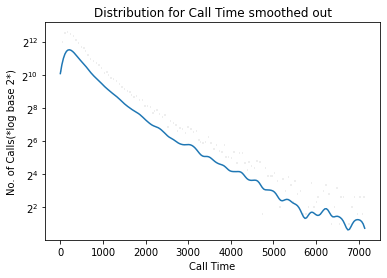

In [53]:
sns.histplot(element2['after_sec'], kde=True, log_scale = (None,2))
plt.title('Distribution for Call Time smoothed out')
plt.xlabel('Call Time')
plt.ylabel('No. of Calls(*log base 2*)')
plt.show()

# shows that most calls x - 10mins next 10 - 30 mins rest are special cases.
# log plot is linear, implying that there is a poisson style distribution of Call Time

In [54]:

df['word_count'] = df['call_transcript'].str.split().str.len()


# transcript length vs call time

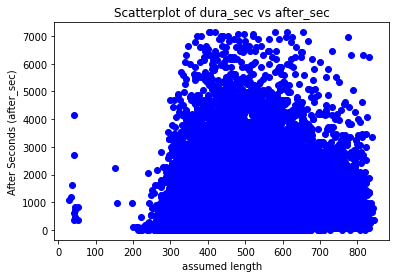

In [55]:
plt.scatter(df['word_count'], element2['after_sec'], color='blue', marker='o')


plt.xlabel('assumed length')
plt.ylabel('After Seconds (after_sec)')
plt.title('Scatterplot of dura_sec vs after_sec')


plt.show()


# FINDING: DATA IS VERY VARIED AS THERE IS NOT A LINEAR RELATIONSHIP BETWEEN word count AND call time ... 
#          possibly indicating varying silence durations in the 

11987    3760940314
Name: call_id, dtype: int64


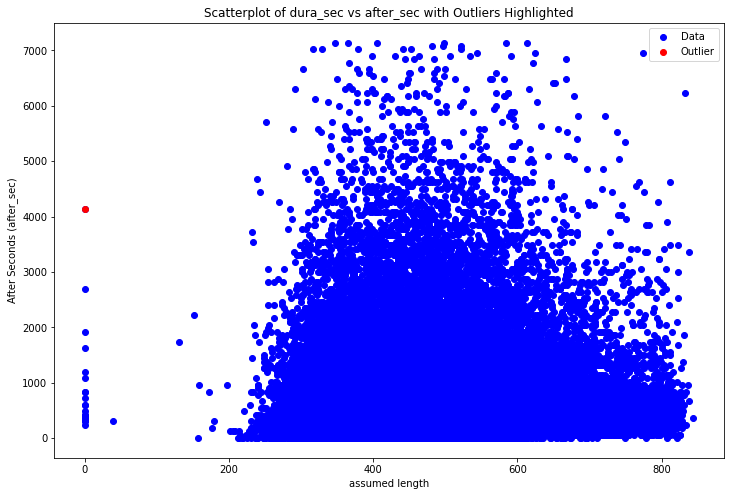

In [350]:

outliers = df[(df['after_sec'] > 4000) & (df['word_count'] < 100)] 


a = outliers['call_id']
print(a)
plt.figure(figsize=(12, 8))

plt.scatter(df['word_count'], df['after_sec'], color='blue', marker='o', label='Data')


plt.scatter(outliers['word_count'], outliers['after_sec'], color='red', marker='o', label='Outlier')

plt.xlabel('assumed length')
plt.ylabel('After Seconds (after_sec)')
plt.title('Scatterplot of dura_sec vs after_sec with Outliers Highlighted')


plt.legend()
plt.show()


# CLOSER INSPECTION OF THE OUTLIER TO REVEAL 'DIRTY DATA/LOGS' IN THE CALL TRANSCRIPT !

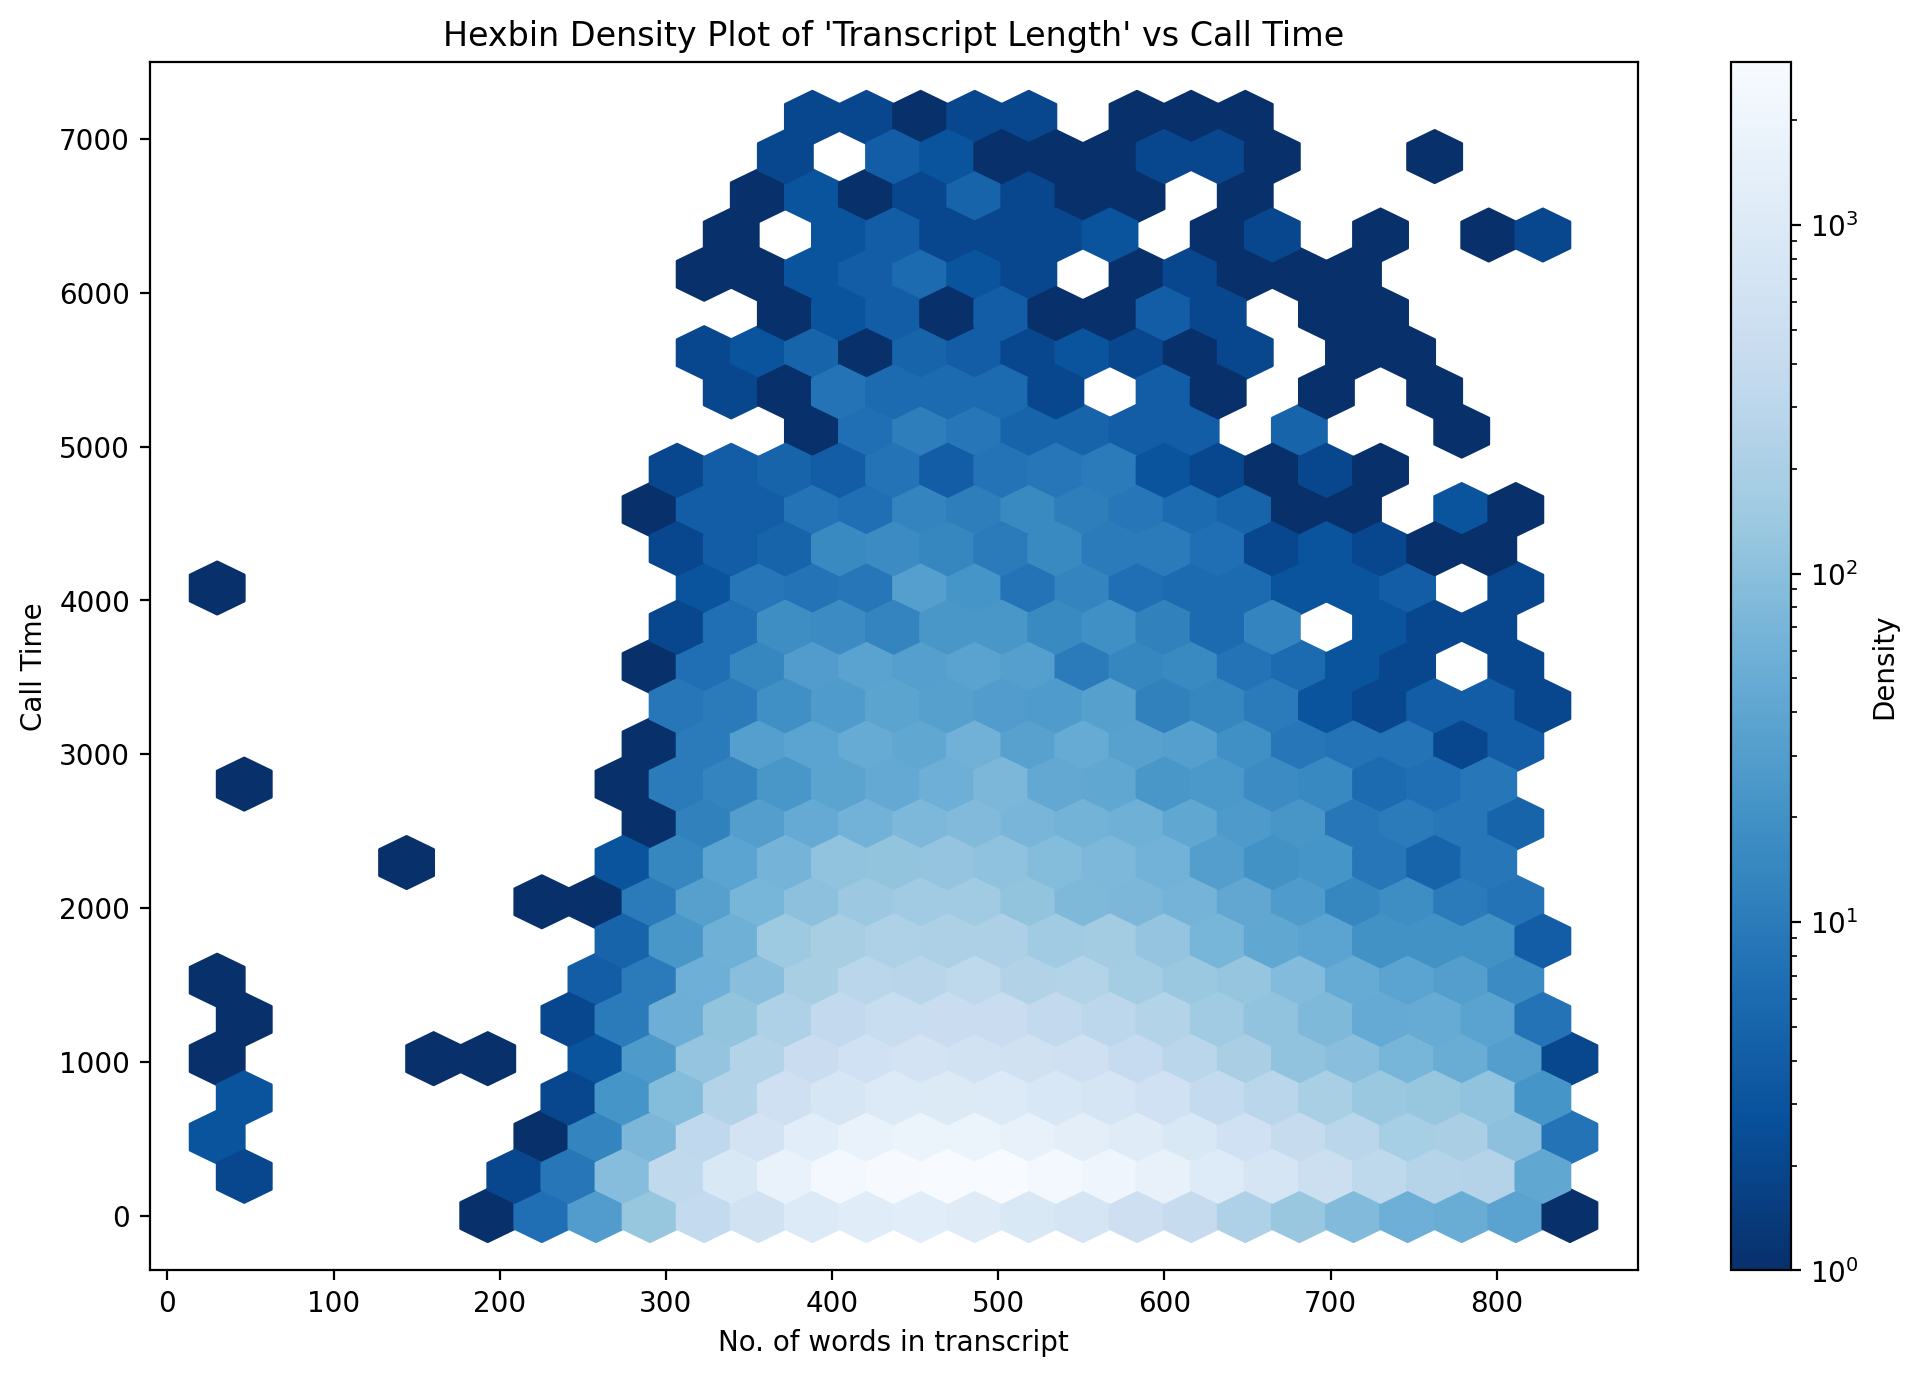

In [56]:
# VISUALISING THE DENSITY USING BIN PLOT
from matplotlib.colors import LogNorm

plt.figure(figsize=(12, 8), dpi = 200)
hb = plt.hexbin(df['word_count'], element2['after_sec'], norm=LogNorm(), gridsize=25, cmap='Blues_r')

plt.xlabel('No. of words in transcript')
plt.ylabel('Call Time')
plt.title('Hexbin Density Plot of \'Transcript Length\' vs Call Time')
plt.colorbar(hb, label='Density')
plt.show()


In [57]:
# CLEANING STEP 1

def filter_transcript(transcript):
    # Split the transcript into individual lines
    lines = transcript.splitlines()
    # Keep only the lines that start with 'Customer:' or 'Agent:'
    filtered_lines = [line for line in lines if line.startswith("Customer:") or line.startswith("Agent:")]
    # Join the filtered lines back into a single string
    return "\n".join(filtered_lines)

# Apply the filter_transcript function to each row in the 'call_transcript' column
df['call_transcript'] = df['call_transcript'].apply(filter_transcript)

In [60]:
# FORMA

reasons = pd.read_csv(r'dataset\reason.csv')
reasons['primary_call_reason'] = reasons['primary_call_reason'].str.strip() # Remove extra spaces
reasons['primary_call_reason'] = reasons['primary_call_reason'].str.lower() # Convert to lowercase
reasons['primary_call_reason'] = reasons['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)
reasons['primary_call_reason'] = reasons['primary_call_reason'].str.replace(r'&', 'and', regex=True)
reasons['primary_call_reason'] = reasons['primary_call_reason'].str.replace(r'-', ' ', regex=True)# Replace multiple spaces with one

In [81]:
# merging 
merged_df = pd.merge(df, reasons, how='inner', on='call_id')
senti = pd.read_csv(r'dataset\sentiment_statistics.csv')
merged_df = pd.merge(merged_df, senti, how='inner', on='call_id')

# VARIOUS DISTRIBUTIONS OF REASONS

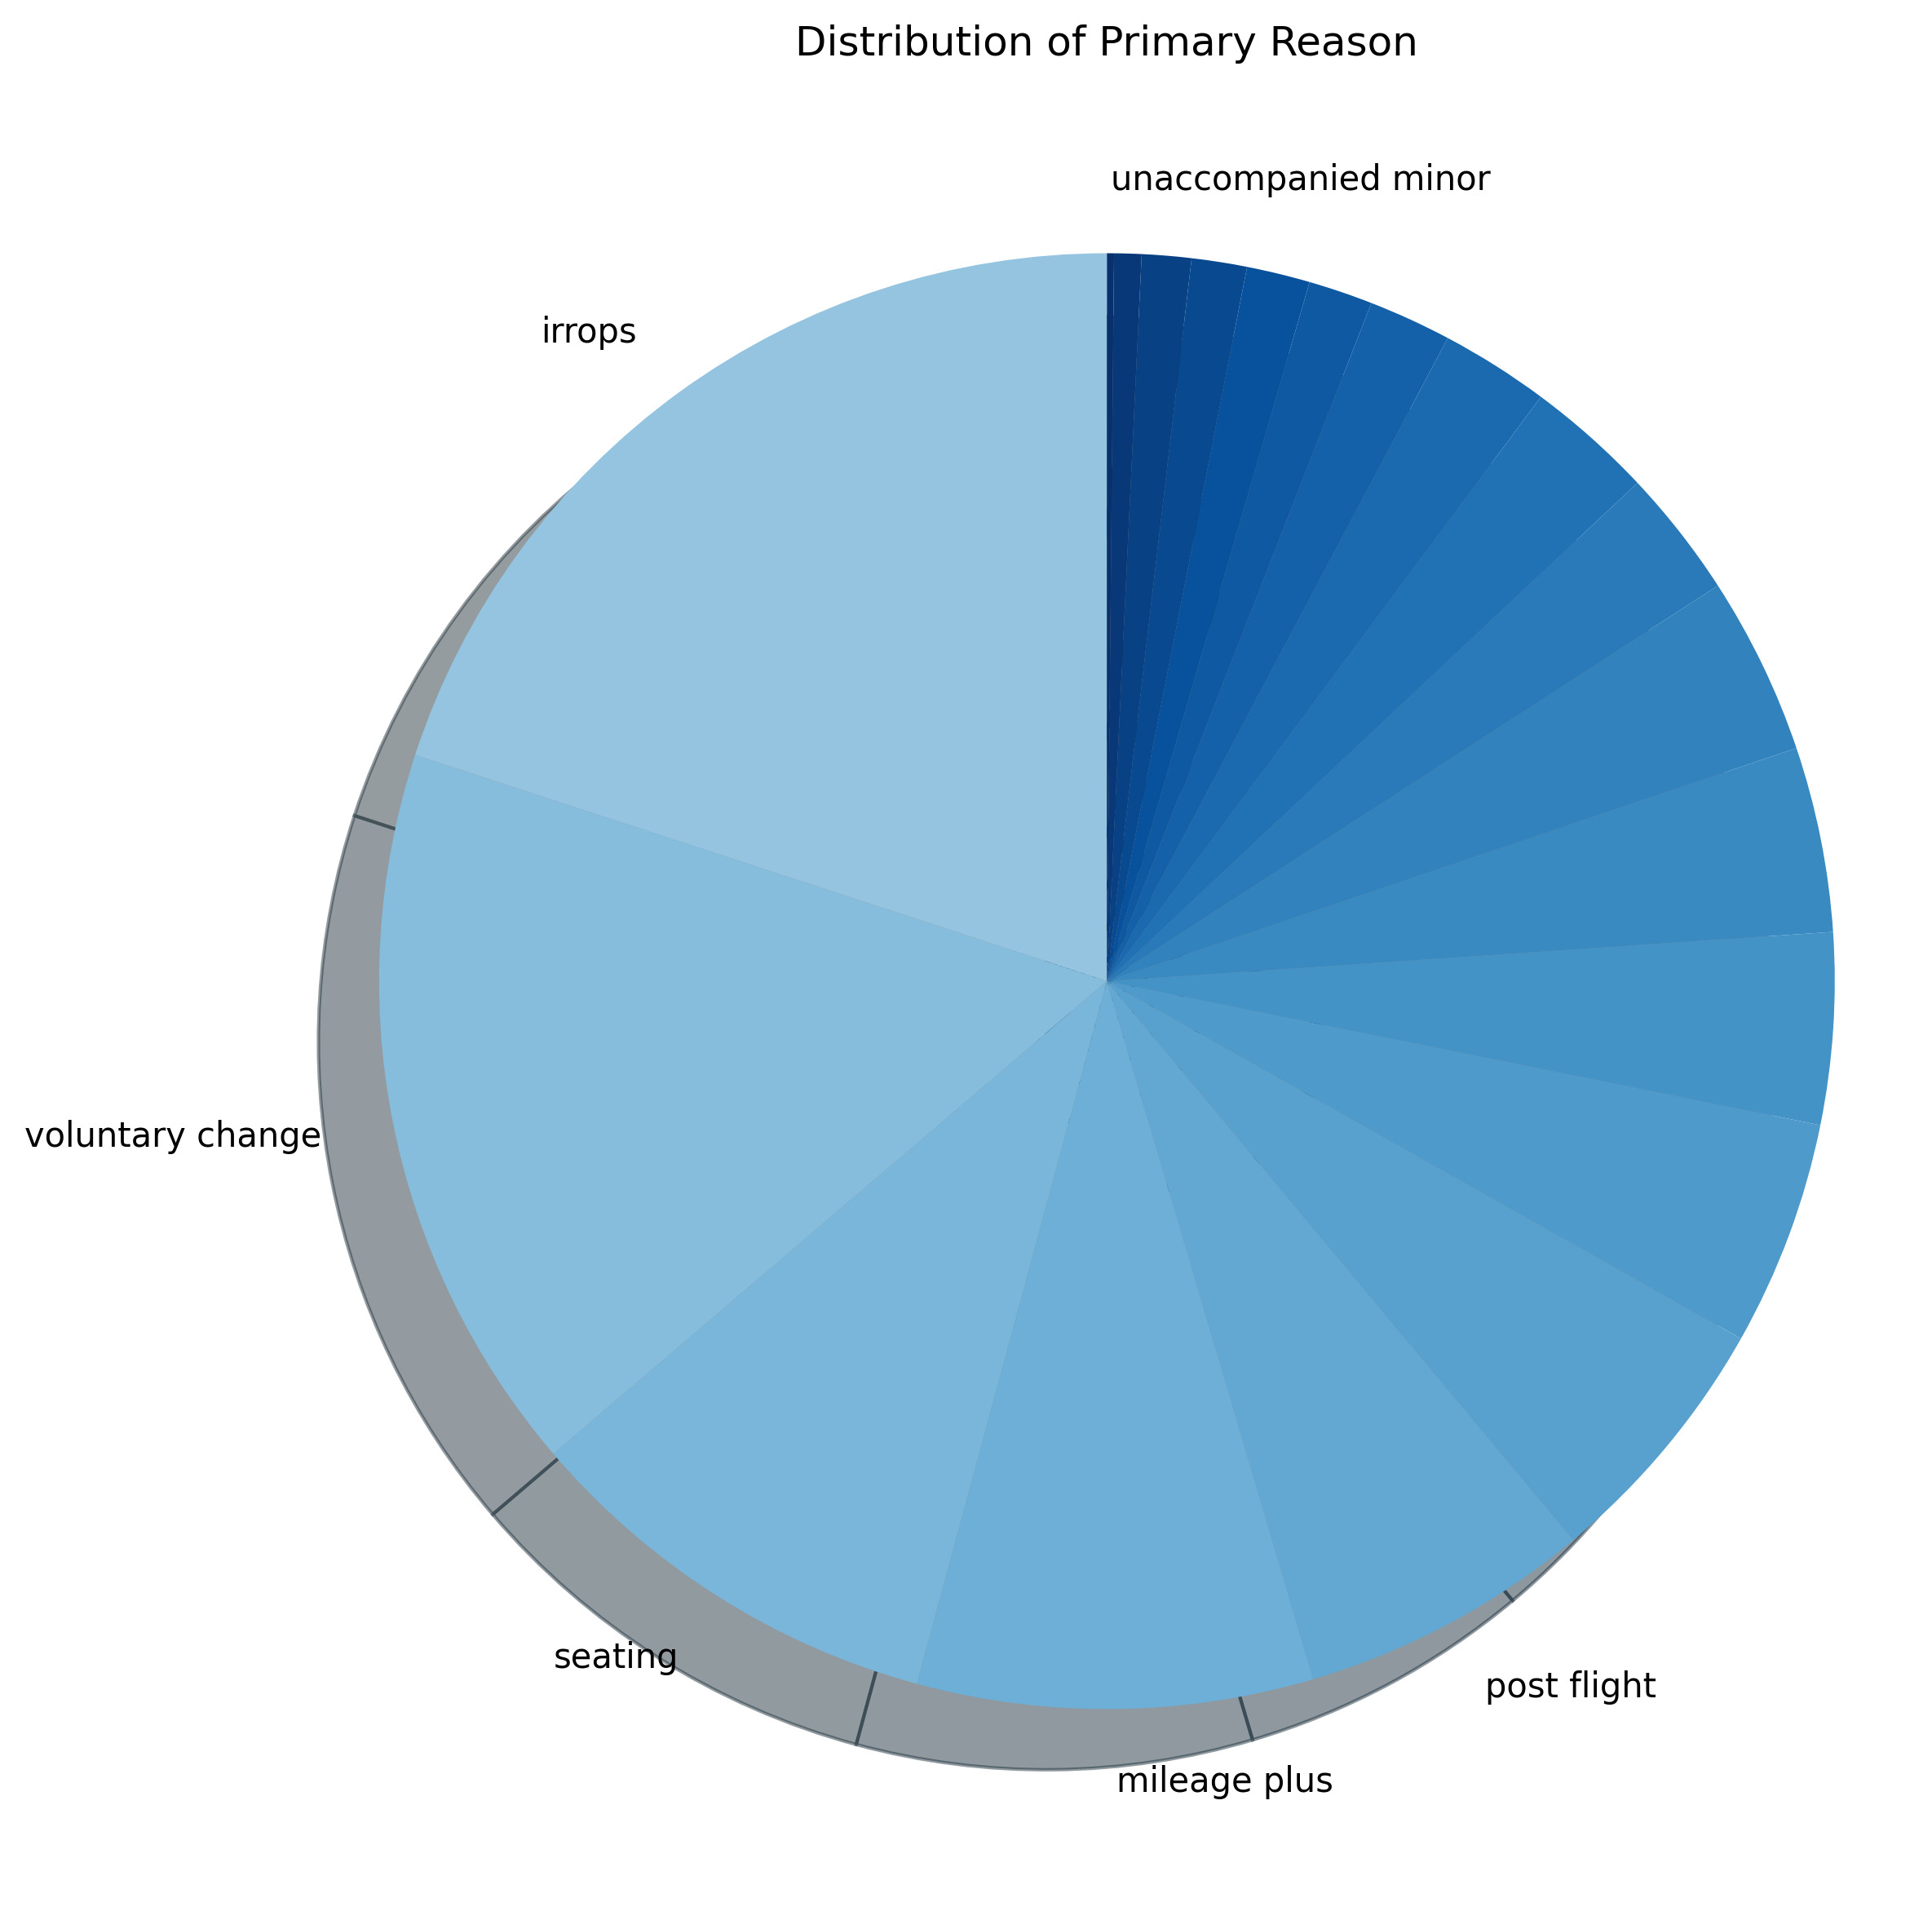

In [63]:
# Define your data for pie chart
labels = merged_df['primary_call_reason'].value_counts().index
sizes = merged_df['primary_call_reason'].value_counts().values

# Only label the first 5 categories, leave the rest blank
labels_to_display = [label if (i < 5 or i == 19) else '' for i, label in enumerate(labels)]

# Plotting the pie chart
cmap = plt.get_cmap("Blues")
colors = cmap(np.linspace(0.4, 1, len(labels)))
fig, ax = plt.subplots(figsize=(8, 8), dpi = 300)
ax.pie(sizes, labels=labels_to_display, startangle=90, 
       pctdistance=0.85, colors=colors, shadow =True)

# Draw a circle at the center to make it a donut chart


# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.title("Distribution of Primary Reason")
plt.show()



# AHT CALCULATION ***IMPORTANT***

In [82]:
merged_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,word_count,start_time,end_time,...,wait_sec,after_sec,dura_sec,hour,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,Agent: Thank you for calling United Airlines c...,408,2024-07-31 23:56:00,2024-08-01 00:34:00,...,420.0,1860.0,2280.0,23,voluntary cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,"Agent: Thank you for calling United Airlines, ...",485,2024-08-01 00:03:00,2024-08-01 00:18:00,...,180.0,720.0,900.0,0,booking,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,Agent: Thank you for calling United Airlines c...,574,2024-07-31 23:59:00,2024-08-01 00:26:00,...,480.0,1140.0,1620.0,23,irrops,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,Agent: Thank you for calling United Airlines c...,592,2024-08-01 00:05:00,2024-08-01 00:17:00,...,300.0,420.0,720.0,0,upgrade,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,Agent: Thank you for calling United Airlines c...,528,2024-08-01 00:04:00,2024-08-01 00:23:00,...,600.0,540.0,1140.0,0,seating,721730,neutral,polite,-0.05,0.35


In [71]:
#CALCULATION OF AHT 

irrops_total_handle_time = merged_df[merged_df['primary_call_reason'] == 'irrops']['after_sec'].sum()
total_irrops_calls = merged_df[merged_df['primary_call_reason'] == 'irrops']['call_id'].count()
#print(irrops_total_handle_time)
#print(total_irrops_calls)

AHT_MostFrequent = round(irrops_total_handle_time/total_irrops_calls,1)
unaccompanied_minor_total_handle_time = merged_df[merged_df['primary_call_reason'] == 'unaccompanied minor']['after_sec'].sum()
total_unaccompanied_minor_calls = merged_df[merged_df['primary_call_reason'] == 'unaccompanied minor']['call_id'].count()
#print(unaccompanied_minor_total_handle_time)
#print(total_unaccompanied_minor_calls)
AHT_LeastFrequent = round(unaccompanied_minor_total_handle_time/total_unaccompanied_minor_calls,1)
#print(AHT_MostFrequent)
#print(AHT_LeastFrequent)

PERCENTAGE_DIFFERENCE = round((AHT_MostFrequent - AHT_LeastFrequent)*100/(AHT_MostFrequent+AHT_LeastFrequent))

bold = '\033[1m'
reset = '\033[0m'
highlight_yellow = '\033[94m'

print(f"{bold}Percentage difference b/w the average handling time for the most and least frequent call reasons is ~"
      f"{highlight_yellow}{PERCENTAGE_DIFFERENCE}%{reset}")


Percentage difference b/w the average handling time for the most and least frequent call reasons is ~20%


#  DIFFERENCE IS 20%

In [72]:
tony = merged_df.groupby('agent_tone')['call_id'].count()
print(tony)

tone = merged_df.groupby('customer_tone')['call_id'].count()
print(tone)

agent_tone
angry           366
calm          22882
frustrated     3438
neutral       39688
polite           81
Name: call_id, dtype: int64
customer_tone
angry         13351
calm          13278
frustrated    13225
neutral       13402
polite        13397
Name: call_id, dtype: int64


In [73]:
# Define the mapping for tone to score
tone_to_score = {
    'polite': 1,
    'calm': 0.5,
    'neutral': 0,
    'frustrated': -0.5,
    'angry': -1
}

# Apply the mapping to create 'agent_score' and 'customer_score' columns
merged_df['agent_score'] = merged_df['agent_tone'].map(tone_to_score)
merged_df['customer_score'] = merged_df['customer_tone'].map(tone_to_score)

# Display the updated DataFrame


sns.heatmap(matrix)

In [76]:
filtered_df = merged_df[merged_df['agent_score'] == 0.5]


In [77]:
matrix = filtered_df[['agent_score','customer_score']]
matrix = matrix.corr()
print(matrix)
# Calculate descriptive statistics for customer_score when agent_score is angry (1)
summary_stats = filtered_df['customer_score'].describe()
print(summary_stats)


                agent_score  customer_score
agent_score             NaN             NaN
customer_score          NaN             1.0
count    22882.000000
mean         0.002753
std          0.705632
min         -1.000000
25%         -0.500000
50%          0.000000
75%          0.500000
max          1.000000
Name: customer_score, dtype: float64


In [78]:
mat = merged_df[['average_sentiment','silence_percent_average']]
mat = mat.corr()
print(mat)

                         average_sentiment  silence_percent_average
average_sentiment                 1.000000                 0.034904
silence_percent_average           0.034904                 1.000000


# PRIMARY CALL REASON GRAPHS

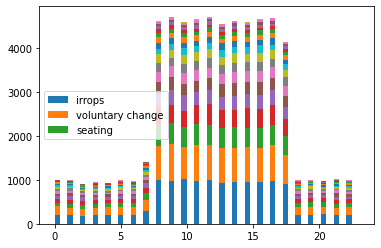

In [84]:

b, bins, patches = plt.hist(
    [merged_df.loc[merged_df['primary_call_reason'] == 'irrops', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'voluntary change', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'seating', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'mileage plus', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'post flight', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'communications', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'products and services', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'baggage', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'upgrade', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'check in', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'checkout', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'voluntary cancel', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'digital support', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'etc', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'traveler updates', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'other topics', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'schedule change', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'disabilty', 'hour'],
     merged_df.loc[merged_df['primary_call_reason'] == 'unaccompanied minor', 'hour']
     ],stacked =True, bins = 24, width = 0.4,
    label=['irrops', 'voluntary change', 'seating'])
plt.legend()

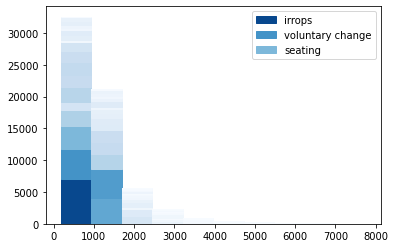

In [424]:
b, bins, patches = plt.hist(
    [merged_df.loc[merged_df['primary_call_reason'] == 'irrops', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'voluntary change', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'seating', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'mileage plus', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'post flight', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'communications', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'products and services', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'baggage', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'upgrade', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'check in', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'checkout', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'voluntary cancel', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'digital support', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'etc', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'traveler updates', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'other topics', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'schedule change', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'disabilty', 'dura_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'unaccompanied minor', 'dura_sec']
     ],
    stacked=True,
    label=['irrops', 'voluntary change', 'seating']
)

# Set the color palette to 'Blues'
for patch_set in patches:
    for patch in patch_set:
        patch.set_color(plt.cm.Blues(patch.get_height() / max(bins)))

# Add legend and plot
plt.xlabel("Reason")
plt.ylabel("No.of Calls")
plt.legend()
plt.show()


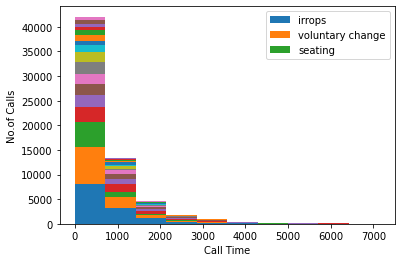

In [425]:

b, bins, patches = plt.hist(
    [merged_df.loc[merged_df['primary_call_reason'] == 'irrops', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'voluntary change', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'seating', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'mileage plus', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'post flight', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'communications', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'products and services', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'baggage', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'upgrade', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'check in', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'checkout', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'voluntary cancel', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'digital support', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'etc', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'traveler updates', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'other topics', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'schedule change', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'disabilty', 'after_sec'],
     merged_df.loc[merged_df['primary_call_reason'] == 'unaccompanied minor', 'after_sec']
     ],stacked =True,
    label=['irrops', 'voluntary change', 'seating'])
plt.xlabel("Call Time")
plt.ylabel("No.of Calls")
plt.legend()

In [386]:

customers = pd.read_csv('customers.csv')
big_df = pd.merge(merged_df, customers, how='inner', on='customer_id')
big_df.head(10)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,start_time,end_time,assign_time,...,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,agent_score,customer_score,customer_name,elite_level_code
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 00:03,8/1/2024 00:34,Agent: Thank you for calling United Airlines c...,2024-07-31 23:56:00,2024-08-01 00:34:00,2024-08-01 00:03:00,...,voluntary cancel,963118,neutral,angry,-0.04,0.39,0.0,-1.0,Matthew Foster,4.0
1,1122072124,8186702651,519057,8/1/2024 00:03,8/1/2024 00:06,8/1/2024 00:18,"Agent: Thank you for calling United Airlines, ...",2024-08-01 00:03:00,2024-08-01 00:18:00,2024-08-01 00:06:00,...,booking,519057,calm,neutral,0.02,0.35,0.5,0.0,Tammy Walters,NaN
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 00:07,8/1/2024 00:26,Agent: Thank you for calling United Airlines c...,2024-07-31 23:59:00,2024-08-01 00:26:00,2024-08-01 00:07:00,...,irrops,158319,neutral,polite,-0.13,0.32,0.0,1.0,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,8/1/2024 00:05,8/1/2024 00:10,8/1/2024 00:17,Agent: Thank you for calling United Airlines c...,2024-08-01 00:05:00,2024-08-01 00:17:00,2024-08-01 00:10:00,...,upgrade,488324,neutral,frustrated,-0.20,0.20,0.0,-0.5,David Wilkins,2.0
4,1211603231,5214456437,721730,8/1/2024 00:04,8/1/2024 00:14,8/1/2024 00:23,Agent: Thank you for calling United Airlines c...,2024-08-01 00:04:00,2024-08-01 00:23:00,2024-08-01 00:14:00,...,seating,721730,neutral,polite,-0.05,0.35,0.0,1.0,Elizabeth Daniels,0.0
5,5297766997,5590154991,817160,8/1/2024 00:11,8/1/2024 00:16,8/1/2024 00:40,Agent: Thank you for calling United Airlines c...,2024-08-01 00:11:00,2024-08-01 00:40:00,2024-08-01 00:16:00,...,mileage plus,817160,calm,calm,0.10,0.11,0.5,0.5,Emily Alexander,5.0
6,324593040,6774865122,519057,8/1/2024 00:08,8/1/2024 00:21,8/1/2024 00:34,Agent: Thank you for calling United Airlines c...,2024-08-01 00:08:00,2024-08-01 00:34:00,2024-08-01 00:21:00,...,checkout,519057,neutral,frustrated,0.00,0.25,0.0,-0.5,James Lawrence,NaN
7,8902603117,7974326984,488324,8/1/2024 00:13,8/1/2024 00:21,8/1/2024 00:29,Agent: Thank you for calling United Airlines c...,2024-08-01 00:13:00,2024-08-01 00:29:00,2024-08-01 00:21:00,...,mileage plus,488324,calm,angry,0.11,0.35,0.5,-1.0,Megan Craig,2.0
8,7222687732,8023417234,957331,8/1/2024 00:14,8/1/2024 00:22,8/1/2024 00:35,Agent: Thank you for calling United Airlines c...,2024-08-01 00:14:00,2024-08-01 00:35:00,2024-08-01 00:22:00,...,mileage plus,957331,calm,neutral,0.06,0.54,0.5,0.0,Alexa Martinez,1.0
9,4113684017,1528835057,158319,8/1/2024 00:20,8/1/2024 00:28,8/1/2024 00:37,"Agent: Thank you for calling United Airlines, ...",2024-08-01 00:20:00,2024-08-01 00:37:00,2024-08-01 00:28:00,...,irrops,158319,neutral,angry,-0.19,0.29,0.0,-1.0,Jonathan Parker,NaN


# MEMBERSHIP ANALYSIS

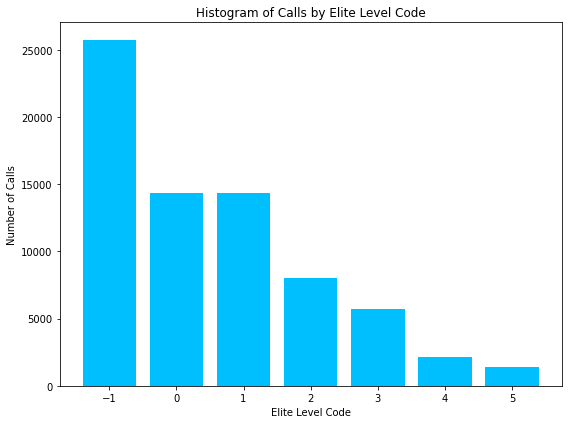

In [20]:

import pandas as pd 
import matplotlib.pyplot as plt
dfA = pd.read_csv("new_calls.csv")
dfB = pd.read_csv("customers.csv")
dfE = pd.merge(dfA, dfB, on="customer_id")

dfE['elite_level_code'] = dfE['elite_level_code'].fillna(-1)

# Group by elite_level_code and count call_ids
call_count_code = dfE.groupby('elite_level_code')['call_id'].count()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(call_count_code.index, call_count_code.values, color='deepskyblue')

# Labels and Title
plt.xlabel('Elite Level Code')
plt.ylabel('Number of Calls')
plt.title('Histogram of Calls by Elite Level Code')
plt.tight_layout()
# Show the plot
plt.show()


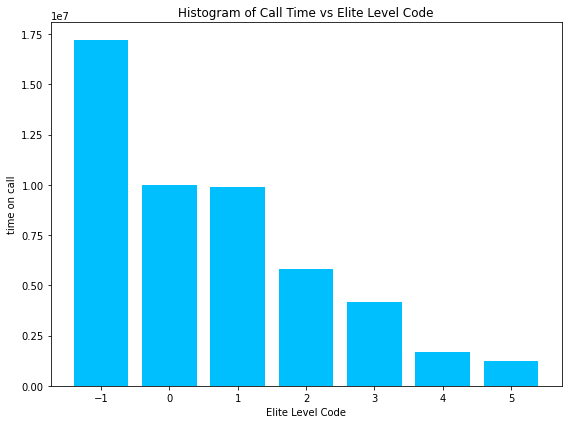

In [31]:

# Sample DataFrame
# Assuming 'elite_level_code' and 'call_id' are columns in your DataFrame
# Replace this with your actual DataFrame.

dfE = pd.merge(dfE, df, on="call_id")
# Replace NaN with a specific value, for example -1, if you want to visualize them
dfE['elite_level_code'] = dfE['elite_level_code'].fillna(-1)

# Group by elite_level_code and count call_ids
call_time_code = dfE.groupby('elite_level_code')['after_sec'].sum()
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(call_time_code.index, call_time_code.values, color='deepskyblue')

# Labels and Title
plt.xlabel('Elite Level Code')
plt.ylabel('time on call')
plt.title('Histogram of Call Time vs Elite Level Code')
plt.tight_layout()
# Show the plot
plt.show()

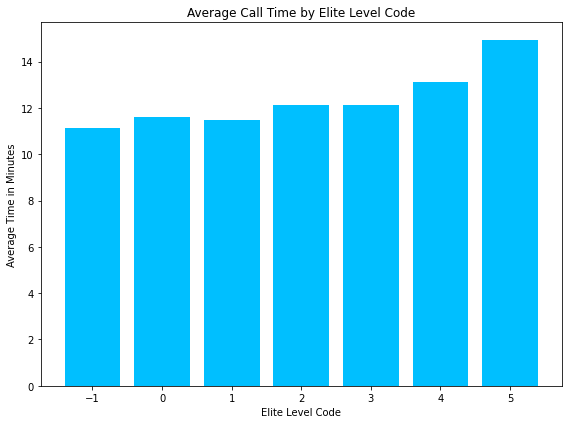

In [34]:


# Calculate the ratio of total call time to call count
call_time_ratio = call_time_code / call_count_code

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(call_time_ratio.index, call_time_ratio.values/60, color='deepskyblue')

# Labels and Title
plt.xlabel('Elite Level Code')
plt.ylabel('Average Time in Minutes')
plt.title('Average Call Time by Elite Level Code')
plt.tight_layout()

# Show the plot
plt.show()


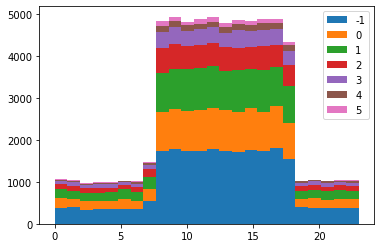

In [406]:
b, bins, patches = plt.hist(
    [big_df.loc[big_df['elite_level_code'] == -1, 'hour'],
     big_df.loc[big_df['elite_level_code'] == 0, 'hour'],
     big_df.loc[big_df['elite_level_code'] == 1, 'hour'],
     big_df.loc[big_df['elite_level_code'] == 2, 'hour'],
     big_df.loc[big_df['elite_level_code'] == 3, 'hour'],
     big_df.loc[big_df['elite_level_code'] == 4, 'hour'],
     big_df.loc[big_df['elite_level_code'] == 5, 'hour']
     ],stacked =True, bins = 24,
    label=[-1,0,1,2,3,4,5,'None'])
plt.legend()

# AGENT ANALYSIS

In [82]:
agents.head(10)

,agent_id,total_after_sec,call_count,avg_calltime
184,547592,180.0,1,180.000000
210,616988,1140.0,4,285.000000
48,229129,2820.0,8,352.500000
238,676262,3120.0,8,390.000000
299,814757,9840.0,23,427.826087
322,859203,1380.0,3,460.000000
23,161354,480.0,1,480.000000
306,824457,8340.0,17,490.588235
39,198489,25800.0,51,505.882353
239,677860,16920.0,33,512.727273


In [85]:
filtered_agents = agents[agents['avg_calltime'] < 600]

In [86]:
print(filtered_agents)

     agent_id  total_after_sec  call_count  avg_calltime
184    547592            180.0           1    180.000000
210    616988           1140.0           4    285.000000
48     229129           2820.0           8    352.500000
238    676262           3120.0           8    390.000000
299    814757           9840.0          23    427.826087
322    859203           1380.0           3    460.000000
23     161354            480.0           1    480.000000
306    824457           8340.0          17    490.588235
39     198489          25800.0          51    505.882353
239    677860          16920.0          33    512.727273
312    835959           3600.0           7    514.285714
36     187770          21420.0          40    535.500000
169    524342          55500.0         103    538.834951
317    852069          30720.0          56    548.571429
84     306996          15420.0          28    550.714286
138    434222           2760.0           5    552.000000
161    510903          60780.0 

# Sentiment analysis and NLP (wordcloud and LDA)

In [49]:
pip install wordcloud

In [50]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
text = ' '.join(merged_df['call_transcript'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='plasma', stopwords=stopwords.words()).generate(text)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Call Transcripts', fontsize=16)
plt.show()


# Word cloud is hard to interpret from, because of size of data and nature of conversation

# Below this are featured wordclouds for positive and negative sentiment values.

NameError: name 'merged_df' is not defined

In [412]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/madhavprasad/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_df is your DataFrame containing call transcripts
text = ' '.join(merged_df['call_transcript'].dropna().tolist())

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Get words and filter negative ones
negative_words = [word for word in text.split() if sia.polarity_scores(word)['compound'] < 0]

# Join the filtered negative words into a single string
filtered_text = ' '.join(negative_words)

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', 
                      colormap='viridis').generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Negative Sentiment Words in Call Transcripts', fontsize=16)
plt.show()


In [411]:
pip install nltk.sentiment

ERROR: Could not find a version that satisfies the requirement nltk.sentiment (from versions: none)
ERROR: No matching distribution found for nltk.sentiment

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


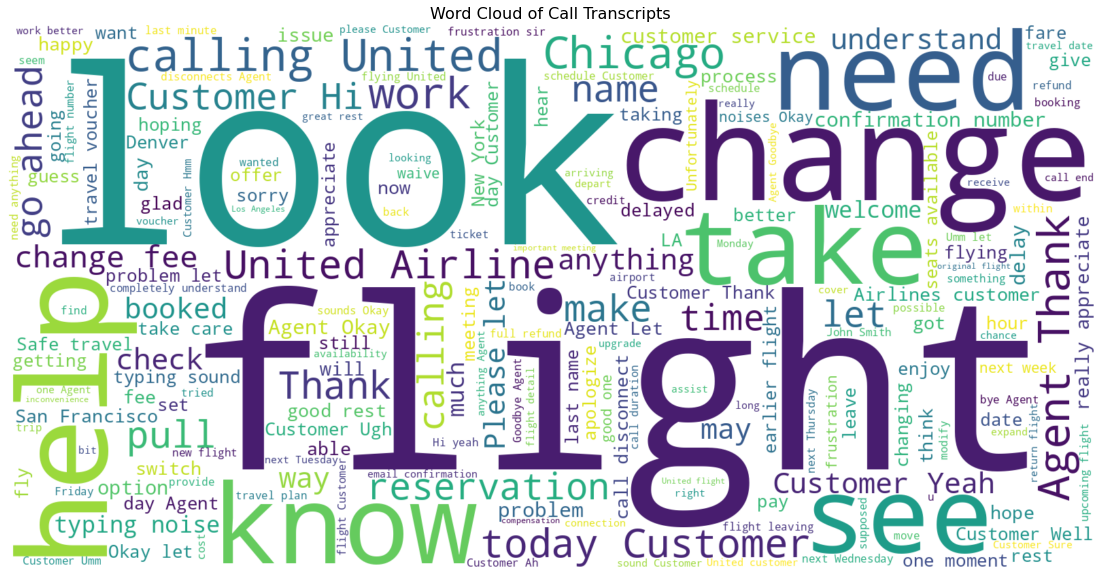

In [90]:
trans = merged_df[merged_df['primary_call_reason'] == 'irrops']
text = ' '.join(trans['call_transcript'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Call Transcripts', fontsize=16)
plt.show()


#compare positive sentiment with negative ones wordcloud

In [409]:
pip install nltk



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


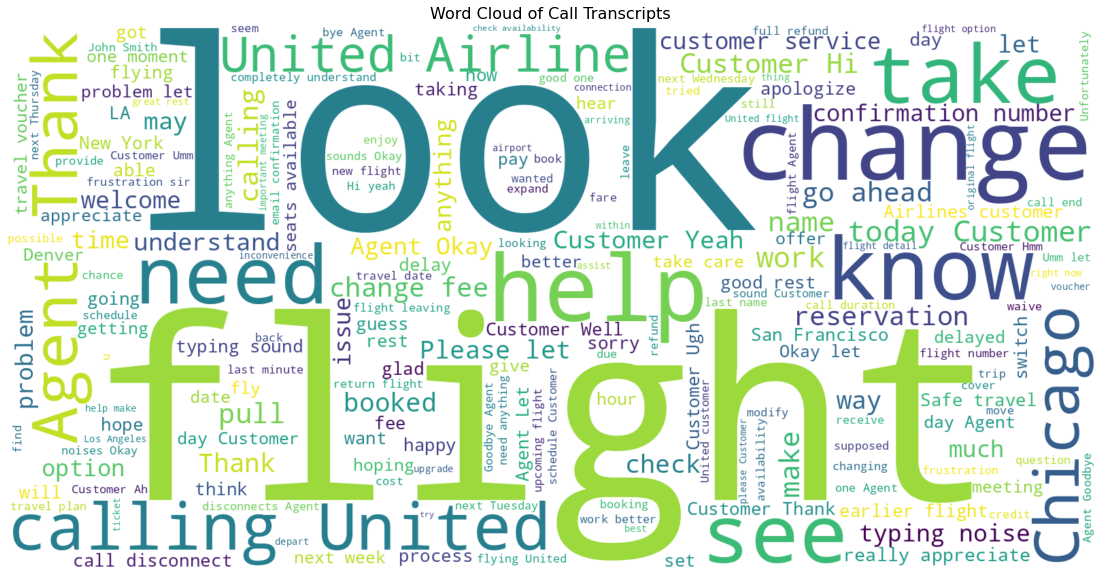

In [103]:
trans = merged_df[merged_df['primary_call_reason'] == 'irrops']
trans = merged_df[merged_df['average_sentiment'] > 0.5]
text1 = ' '.join(trans['call_transcript'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Call Transcripts', fontsize=16)
plt.show()



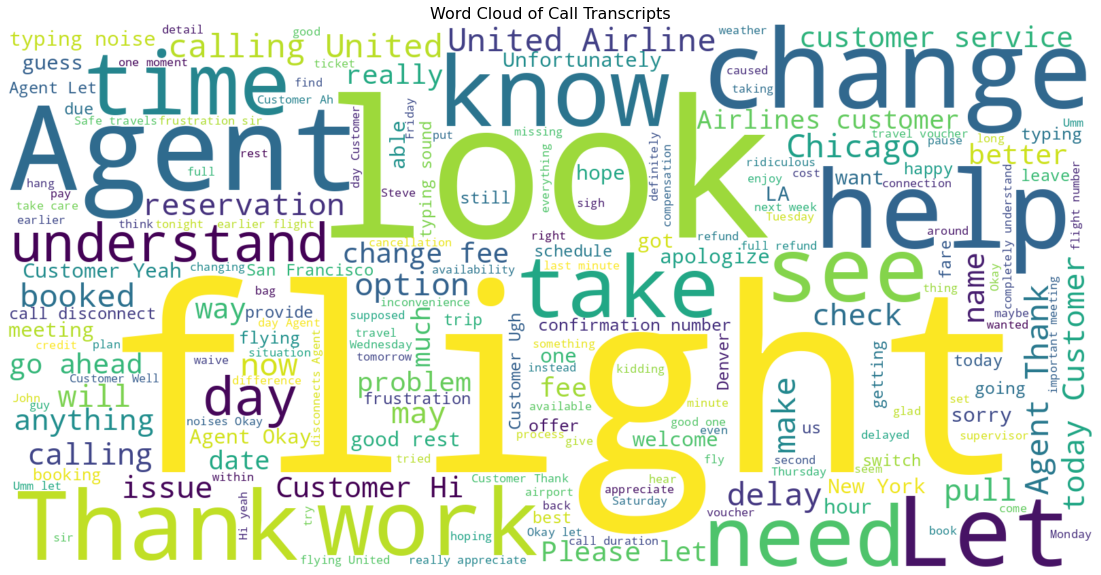

In [105]:
trans = merged_df[merged_df['primary_call_reason'] == 'irrops']
trans = merged_df[merged_df['average_sentiment'] < -0.5]
text2 = ' '.join(trans['call_transcript'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='viridis').generate(text2)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Call Transcripts', fontsize=16)
plt.show()

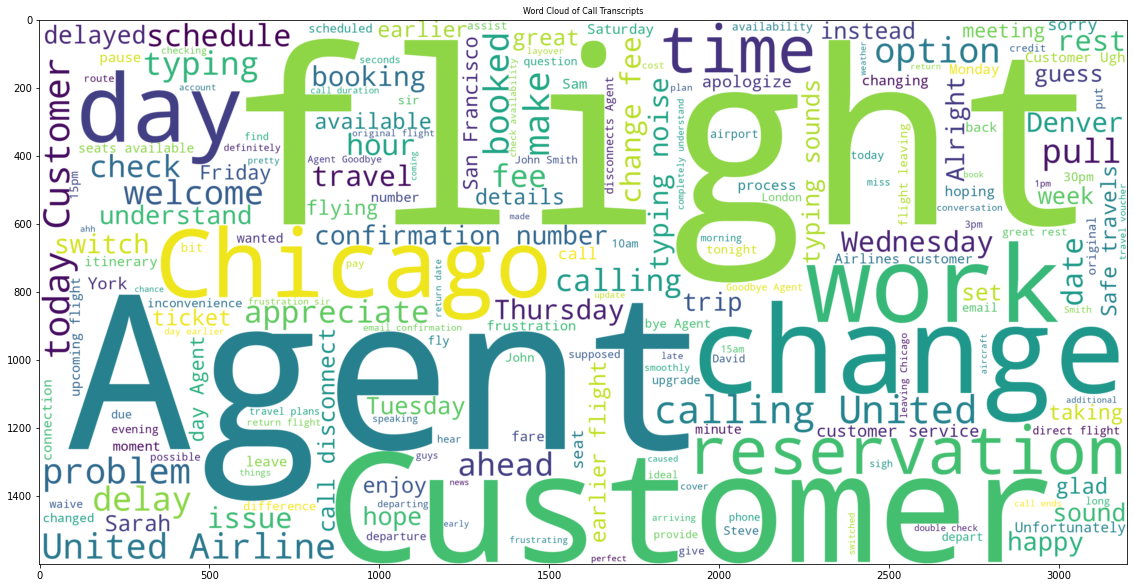

In [292]:
from wordcloud import STOPWORDS
from nltk.corpus import stopwords

# Generate the first word cloud
wordcloud1 = WordCloud(
    width=3200,
    height=1600,
    background_color='white',
    colormap='viridis',
    stopwords=stopwords.words(),
    max_words=200,
).generate(text1)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud1, interpolation='bilinear')

plt.title('Word Cloud of Call Transcripts', fontsize=8)
plt.show()

In [138]:
merged_df.head(5)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,start_time,end_time,assign_time,...,time_only,hour,minute,half_hour,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 00:03,8/1/2024 00:34,\n\nAgent: Thank you for calling United Airlin...,2024-07-31 23:56:00,2024-08-01 00:34:00,2024-08-01 00:03:00,...,23:56:00,23,56,23.5,voluntary cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,8/1/2024 00:03,8/1/2024 00:06,8/1/2024 00:18,\n\nAgent: Thank you for calling United Airlin...,2024-08-01 00:03:00,2024-08-01 00:18:00,2024-08-01 00:06:00,...,00:03:00,0,3,0.0,booking,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 00:07,8/1/2024 00:26,\n\nAgent: Thank you for calling United Airlin...,2024-07-31 23:59:00,2024-08-01 00:26:00,2024-08-01 00:07:00,...,23:59:00,23,59,23.5,irrops,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,8/1/2024 00:05,8/1/2024 00:10,8/1/2024 00:17,\n\nAgent: Thank you for calling United Airlin...,2024-08-01 00:05:00,2024-08-01 00:17:00,2024-08-01 00:10:00,...,00:05:00,0,5,0.0,upgrade,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,8/1/2024 00:04,8/1/2024 00:14,8/1/2024 00:23,\n\nAgent: Thank you for calling United Airlin...,2024-08-01 00:04:00,2024-08-01 00:23:00,2024-08-01 00:14:00,...,00:04:00,0,4,0.0,seating,721730,neutral,polite,-0.05,0.35


In [174]:
total_number = merged_df.count()

In [175]:
print(total_number)

call_id                    66653
customer_id                66653
agent_id_x                 66653
call_start_datetime        66653
agent_assigned_datetime    66653
call_end_datetime          66653
call_transcript            66653
start_time                 66653
end_time                   66653
assign_time                66653
duration                   66653
waiting                    66653
after                      66653
wait_sec                   66653
after_sec                  66653
dura_sec                   66653
time_only                  66653
hour                       66653
word_count                 66653
primary_call_reason        66653
agent_id_y                 66653
agent_tone                 66455
customer_tone              66653
average_sentiment          66552
silence_percent_average    66653
dtype: int64


In [272]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load your DataFrame (ensure 'call_transcript' is the correct column name)
# df = pd.read_csv('your_data.csv')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]  # Remove stop words and lemmatize
    return ' '.join(tokens)

# Apply preprocessing to the transcripts
df['cleaned_transcript'] = df['call_transcript'].apply(preprocess_text)

# Check for NaN values and handle them
print(df['cleaned_transcript'].isnull().sum())
df = df.dropna(subset=['cleaned_transcript'])  # Option to drop NaN values
# Alternatively: df['cleaned_transcript'] = df['cleaned_transcript'].fillna('')

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['cleaned_transcript'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display topics
for index, topic in enumerate(lda.components_):
    print(f'Topic {index}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


0
Topic 0:
['time', 'double', 'aisle', 'economy', 'standby', 'check', 'wanted', 'bag', 'upgrade', 'seat']
Topic 1:
['pm', 'frustration', 'voucher', 'issue', 'hour', 'sir', 'meeting', 'tomorrow', 'get', 'delay']
Topic 2:
['wednesday', 'next', 'monday', 'need', 'day', 'work', 'would', 'date', 'fee', 'change']
Topic 3:
['next', 'change', 'wanted', 'ease', 'storm', 'mind', 'time', 'delay', 'forecast', 'weather']
Topic 4:
['lost', 'hour', 'make', 'took', 'issue', 'voucher', 'bag', 'refund', 'delay', 'experience']


In [ ]:
# THE ABOVE IS AN ALTERNATE TO WORD CLOUD AND HELPED IN OUR ANALYSIS

In [47]:
df.columns

Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'start_time', 'end_time', 'assign_time', 'duration', 'waiting', 'after',
       'wait_sec', 'after_sec', 'dura_sec', 'time_only', 'hour', 'word_count'],
      dtype='object')